# Loading and visualizing data
***

In [1]:
# Imports
import ast
import pandas as pd


# Loading data
no_opa_data = []
with open("movie-wfs-no-opa-startup-time.dat", 'r') as f:
    for line in f:
        no_opa_data.append(ast.literal_eval(line))

opa_data = []
with open("movie-wfs-opa-startup-time.dat", 'r') as f:
    for line in f:
        opa_data.append(ast.literal_eval(line))


# Loading data into DataFrames
df_no_opa = pd.DataFrame(no_opa_data, columns=['name', 'pod_scheduled', 'initialized', 'containers_ready', 'ready', 'startup'])
df_opa = pd.DataFrame(opa_data, columns=['name', 'pod_scheduled', 'initialized', 'containers_ready', 'ready', 'startup'])


# Convert 'startup' to integers
df_no_opa['startup'] = df_no_opa['startup'].astype(int)
df_opa['startup'] = df_opa['startup'].astype(int)

In [2]:
# Printing NO OPA DataFrame
df_no_opa

,name,pod_scheduled,initialized,containers_ready,ready,startup
0,owner,2020-06-10T22:47:08Z,2020-06-10T22:47:11Z,2020-06-10T22:47:15Z,2020-06-10T22:47:15Z,7
1,vfx-1,2020-06-10T22:49:36Z,2020-06-10T22:49:39Z,2020-06-10T22:49:43Z,2020-06-10T22:49:43Z,7
2,vfx-2,2020-06-10T22:50:58Z,2020-06-10T22:51:01Z,2020-06-10T22:51:06Z,2020-06-10T22:51:06Z,8
3,vfx-3,2020-06-10T22:51:38Z,2020-06-10T22:51:41Z,2020-06-10T22:51:46Z,2020-06-10T22:51:46Z,8
4,color,2020-06-10T22:41:43Z,2020-06-10T22:41:45Z,2020-06-10T22:41:50Z,2020-06-10T22:41:50Z,7
...,...,...,...,...,...,...
1110,sound,2020-06-11T23:25:05Z,2020-06-11T23:25:08Z,2020-06-11T23:25:14Z,2020-06-11T23:25:14Z,9
1111,hdr,2020-06-11T23:25:52Z,2020-06-11T23:25:55Z,2020-06-11T23:26:01Z,2020-06-11T23:26:01Z,9
1112,color,2020-06-11T23:26:45Z,2020-06-11T23:26:48Z,2020-06-11T23:26:52Z,2020-06-11T23:26:52Z,7
1113,sound,2020-06-11T23:27:31Z,2020-06-11T23:27:34Z,2020-06-11T23:27:39Z,2020-06-11T23:27:39Z,8


In [3]:
# Describe DataFrame
df_opa.describe()

,startup
count,1088.000000
mean,7.834559
std,1.026879
min,5.000000
25%,7.000000
50%,8.000000
75%,8.000000
max,14.000000


In [4]:
# Printing OPA DataFrame
df_opa

,name,pod_scheduled,initialized,containers_ready,ready,startup
0,owner,2020-06-10T19:36:38Z,2020-06-10T19:36:41Z,2020-06-10T19:36:46Z,2020-06-10T19:36:46Z,8
1,vfx-1,2020-06-10T19:36:42Z,2020-06-10T19:36:45Z,2020-06-10T19:36:51Z,2020-06-10T19:36:51Z,9
2,vfx-2,2020-06-10T19:37:21Z,2020-06-10T19:37:24Z,2020-06-10T19:37:29Z,2020-06-10T19:37:29Z,8
3,vfx-3,2020-06-10T19:38:02Z,2020-06-10T19:38:05Z,2020-06-10T19:38:11Z,2020-06-10T19:38:11Z,9
4,color,2020-06-10T19:38:38Z,2020-06-10T19:38:40Z,2020-06-10T19:38:45Z,2020-06-10T19:38:45Z,7
...,...,...,...,...,...,...
1083,hdr,2020-06-15T16:32:15Z,2020-06-15T16:32:17Z,2020-06-15T16:32:22Z,2020-06-15T16:32:22Z,7
1084,owner,2020-06-15T16:33:28Z,2020-06-15T16:33:30Z,2020-06-15T16:33:36Z,2020-06-15T16:33:36Z,8
1085,color,2020-06-15T16:33:32Z,2020-06-15T16:33:35Z,2020-06-15T16:33:39Z,2020-06-15T16:33:39Z,7
1086,hdr,2020-06-15T16:34:15Z,2020-06-15T16:34:17Z,2020-06-15T16:34:24Z,2020-06-15T16:34:24Z,9


In [5]:
# Describe DataFrame
df_no_opa.describe()

,startup
count,1115.000000
mean,7.147085
std,1.061772
min,5.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,15.000000


# Filtering DataFrames by pod
***

In [6]:
# NO OPA filters
no_opa_is_owner = df_no_opa['name'] == "owner"
no_opa_is_vfx_1 = df_no_opa['name'] == "vfx-1"
no_opa_is_vfx_2 = df_no_opa['name'] == "vfx-2"
no_opa_is_vfx_3 = df_no_opa['name'] == "vfx-3"
no_opa_is_color = df_no_opa['name'] == "color"
no_opa_is_sound = df_no_opa['name'] == "sound"
no_opa_is_hdr   = df_no_opa['name'] == "hdr"

# Filtered DataFrames by pod
df_no_opa_owner = df_no_opa[no_opa_is_owner]
df_no_opa_vfx_1 = df_no_opa[no_opa_is_vfx_1]
df_no_opa_vfx_2 = df_no_opa[no_opa_is_vfx_2]
df_no_opa_vfx_3 = df_no_opa[no_opa_is_vfx_3]
df_no_opa_color = df_no_opa[no_opa_is_color]
df_no_opa_sound = df_no_opa[no_opa_is_sound]
df_no_opa_hdr   = df_no_opa[no_opa_is_hdr]

dfs_no_opa_pods = [df_no_opa_owner, df_no_opa_vfx_1, df_no_opa_vfx_2, df_no_opa_vfx_3, df_no_opa_color, df_no_opa_sound, df_no_opa_hdr]


# OPA filters
opa_is_owner = df_opa['name'] == "owner"
opa_is_vfx_1 = df_opa['name'] == "vfx-1"
opa_is_vfx_2 = df_opa['name'] == "vfx-2"
opa_is_vfx_3 = df_opa['name'] == "vfx-3"
opa_is_color = df_opa['name'] == "color"
opa_is_sound = df_opa['name'] == "sound"
opa_is_hdr   = df_opa['name'] == "hdr"

# Filtered DataFrames by pod
df_opa_owner = df_opa[opa_is_owner]
df_opa_vfx_1 = df_opa[opa_is_vfx_1]
df_opa_vfx_2 = df_opa[opa_is_vfx_2]
df_opa_vfx_3 = df_opa[opa_is_vfx_3]
df_opa_color = df_opa[opa_is_color]
df_opa_sound = df_opa[opa_is_sound]
df_opa_hdr   = df_opa[opa_is_hdr]

dfs_opa_pods = [df_opa_owner, df_opa_vfx_1, df_opa_vfx_2, df_opa_vfx_3, df_opa_color, df_opa_sound, df_opa_hdr]

In [7]:
# Describe each DataFrame per Pod
for df in dfs_opa_pods:
    print(df.iat[0,0])
    print(df.describe())
    print('\n')

owner
          startup
count  157.000000
mean     7.445860
std      1.027786
min      5.000000
25%      7.000000
50%      7.000000
75%      8.000000
max     14.000000


vfx-1
          startup
count  138.000000
mean     8.173913
std      1.003010
min      6.000000
25%      8.000000
50%      8.000000
75%      9.000000
max     12.000000


vfx-2
         startup
count  135.00000
mean     8.22963
std      1.05052
min      6.00000
25%      8.00000
50%      8.00000
75%      9.00000
max     11.00000


vfx-3
          startup
count  135.000000
mean     8.451852
std      0.990391
min      6.000000
25%      8.000000
50%      8.000000
75%      9.000000
max     11.000000


color
          startup
count  257.000000
mean     7.478599
std      0.918840
min      5.000000
25%      7.000000
50%      7.000000
75%      8.000000
max     10.000000


sound
          startup
count  130.000000
mean     7.830769
std      0.899082
min      6.000000
25%      7.000000
50%      8.000000
75%      8.000000
max     1

In [8]:
# Describe each DataFrame per Pod
for df in dfs_no_opa_pods:
    print(df.iat[0,0])
    print(df.describe())
    print('\n')

owner
         startup
count  74.000000
mean    7.229730
std     0.884374
min     5.000000
25%     7.000000
50%     7.000000
75%     8.000000
max     9.000000


vfx-1
         startup
count  75.000000
mean    7.026667
std     1.013068
min     5.000000
25%     6.000000
50%     7.000000
75%     8.000000
max     9.000000


vfx-2
         startup
count  74.000000
mean    7.513514
std     1.036898
min     5.000000
25%     7.000000
50%     7.000000
75%     8.000000
max    10.000000


vfx-3
         startup
count  73.000000
mean    7.438356
std     0.865806
min     6.000000
25%     7.000000
50%     7.000000
75%     8.000000
max    10.000000


color
          startup
count  280.000000
mean     6.571429
std      0.992032
min      5.000000
25%      6.000000
50%      7.000000
75%      7.000000
max     14.000000


sound
          startup
count  264.000000
mean     7.484848
std      1.130193
min      5.000000
25%      7.000000
50%      7.000000
75%      8.000000
max     15.000000


hdr
          st

# Matching sample sizes across DataFrames
***

In [26]:
equal_sample_size = 70

# Adjust sample sizes for comparison
df_no_opa_owner = df_no_opa_owner.head(equal_sample_size)
df_no_opa_vfx_1 = df_no_opa_vfx_1.head(equal_sample_size)
df_no_opa_vfx_2 = df_no_opa_vfx_2.head(equal_sample_size)
df_no_opa_vfx_3 = df_no_opa_vfx_3.head(equal_sample_size)
df_no_opa_color = df_no_opa_color.head(equal_sample_size)
df_no_opa_sound = df_no_opa_sound.head(equal_sample_size)
df_no_opa_hdr   = df_no_opa_hdr.head(equal_sample_size)

df_opa_owner = df_opa_owner.head(equal_sample_size)
df_opa_vfx_1 = df_opa_vfx_1.head(equal_sample_size)
df_opa_vfx_2 = df_opa_vfx_2.head(equal_sample_size)
df_opa_vfx_3 = df_opa_vfx_3.head(equal_sample_size)
df_opa_color = df_opa_color.head(equal_sample_size)
df_opa_sound = df_opa_sound.head(equal_sample_size)
df_opa_hdr   = df_opa_hdr.head(equal_sample_size)

dfs_opa_pods = [df_opa_owner, df_opa_vfx_1, df_opa_vfx_2, df_opa_vfx_3, df_opa_color, df_opa_sound, df_opa_hdr]
dfs_no_opa_pods = [df_no_opa_owner, df_no_opa_vfx_1, df_no_opa_vfx_2, df_no_opa_vfx_3, df_no_opa_color, df_no_opa_sound, df_no_opa_hdr]

# Verify shapes of DataFrames
for dfs in dfs_no_opa_pods:
    print(dfs.shape)

for dfs in dfs_opa_pods:
    print(dfs.shape)

(70, 6)
(70, 6)
(70, 6)
(70, 6)
(70, 6)
(70, 6)
(70, 6)
(70, 6)
(70, 6)
(70, 6)
(70, 6)
(70, 6)
(70, 6)
(70, 6)


# Plotting distributions
***

In [10]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

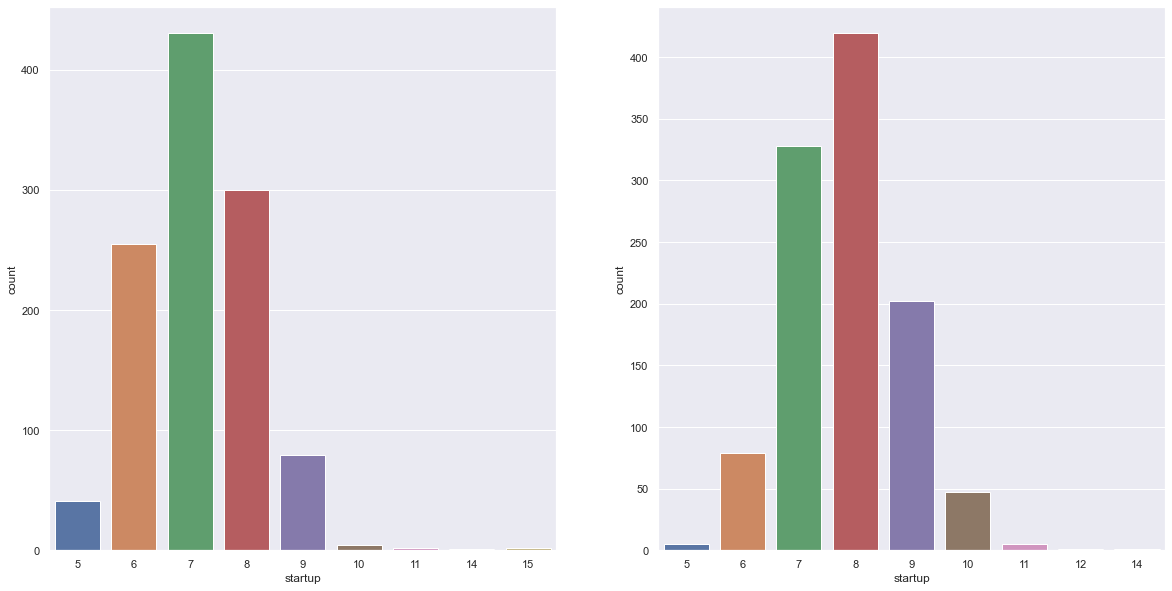

In [11]:
# Countplots
fig, ax = plt.subplots(1,2)
sns.countplot(df_no_opa['startup'], ax=ax[0])
sns.countplot(df_opa['startup'], ax=ax[1])
fig.show()

In [12]:
# Plot the distribution of a DataFrame
def plot_distribution(inp, inp_color):
    plt.figure()
    ax = sns.distplot(inp, color=inp_color, bins=np.arange(inp.min(), inp.max() + 1), kde_kws={'bw':1}, hist_kws={'linewidth':0.1})
    plt.axvline(np.mean(inp), color=inp_color, linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

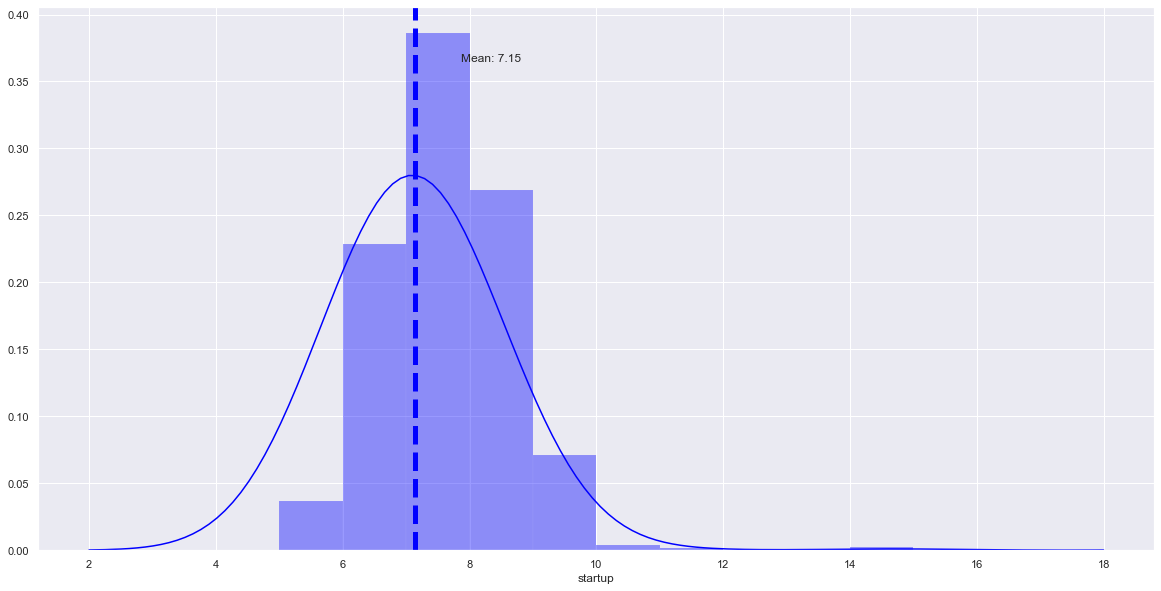

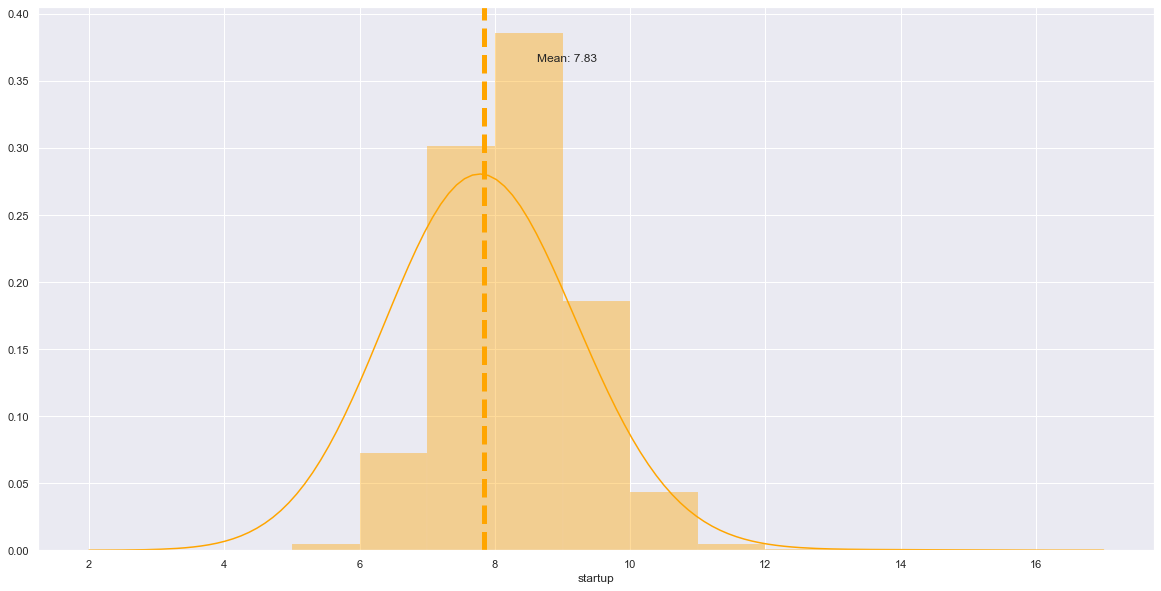

In [13]:
# Plotting the distribution of startup times with/without OPA
plot_distribution(df_no_opa["startup"], 'blue')
plot_distribution(df_opa["startup"], 'orange')

In [14]:
# Plot the distribution of two DataFrames
def plot_distribution_2(inp1, inp2, title='Default title', inp_color1='blue', inp_color2='orange'):
    plt.figure()
    ax1 = sns.distplot(inp1, color=inp_color1, bins=np.arange(inp1.min(), inp1.max() + 1), kde_kws={'bw':1}, hist_kws={'linewidth':0.1})
    ax2 = sns.distplot(inp2, color=inp_color2, bins=np.arange(inp2.min(), inp2.max() + 1), kde_kws={'bw':1}, hist_kws={'linewidth':0.1})
    plt.axvline(np.mean(inp1), color=inp_color1, linestyle="dashed", linewidth=5)
    plt.axvline(np.mean(inp2), color=inp_color2, linestyle="dashed", linewidth=5)
    ax1.set_title(title, fontsize=16)
    return plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

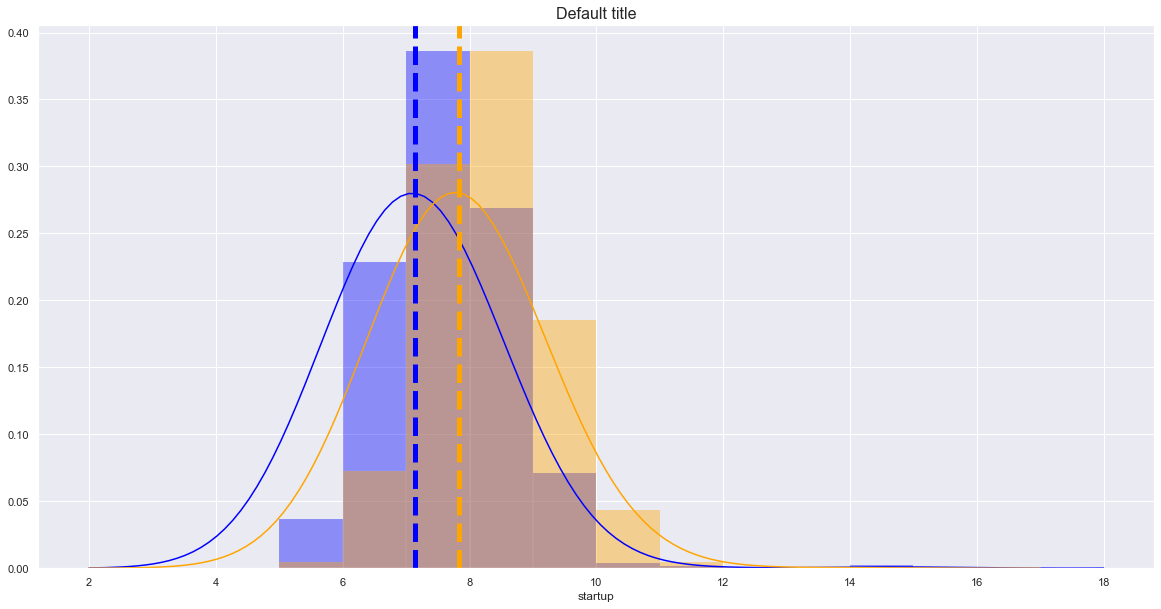

In [15]:
# Distribution of NO OPA vs OPA
plot_distribution_2(df_no_opa['startup'], df_opa['startup'])

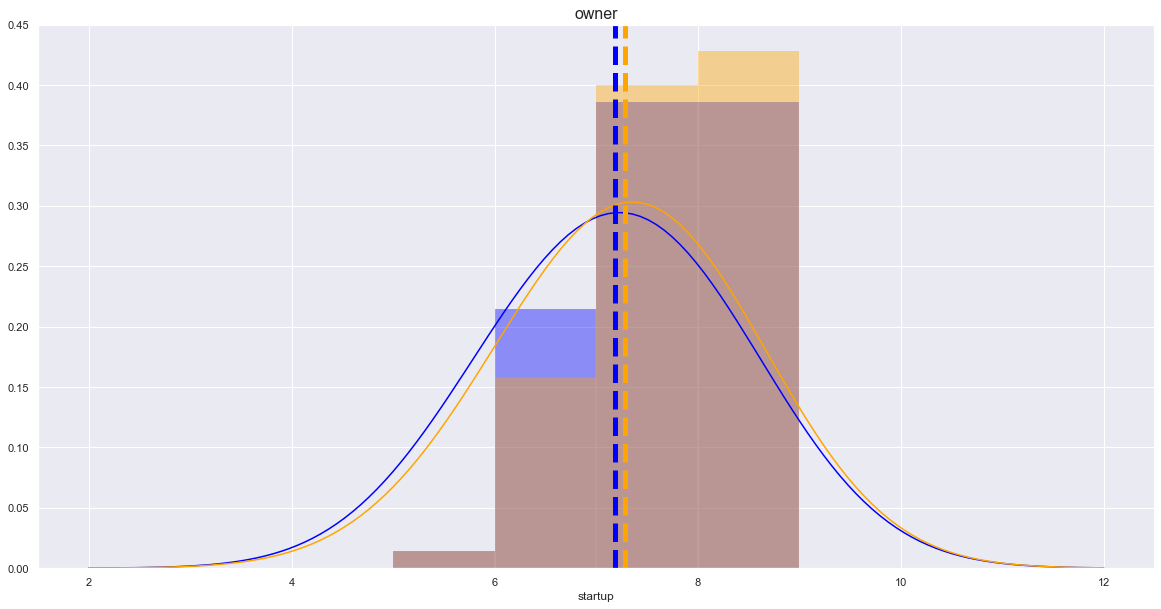

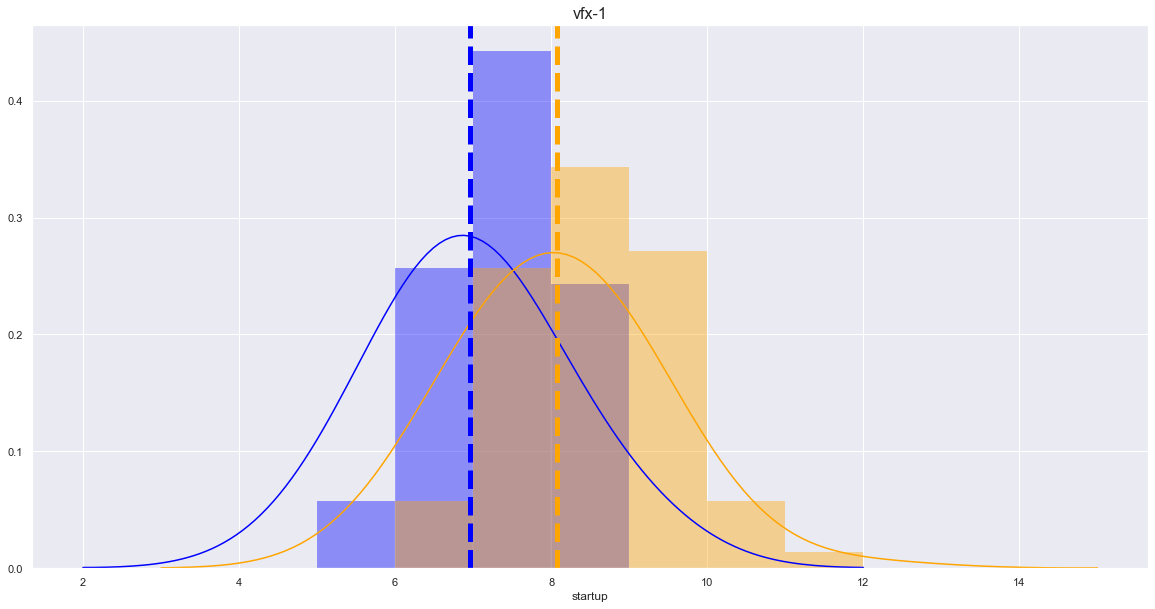

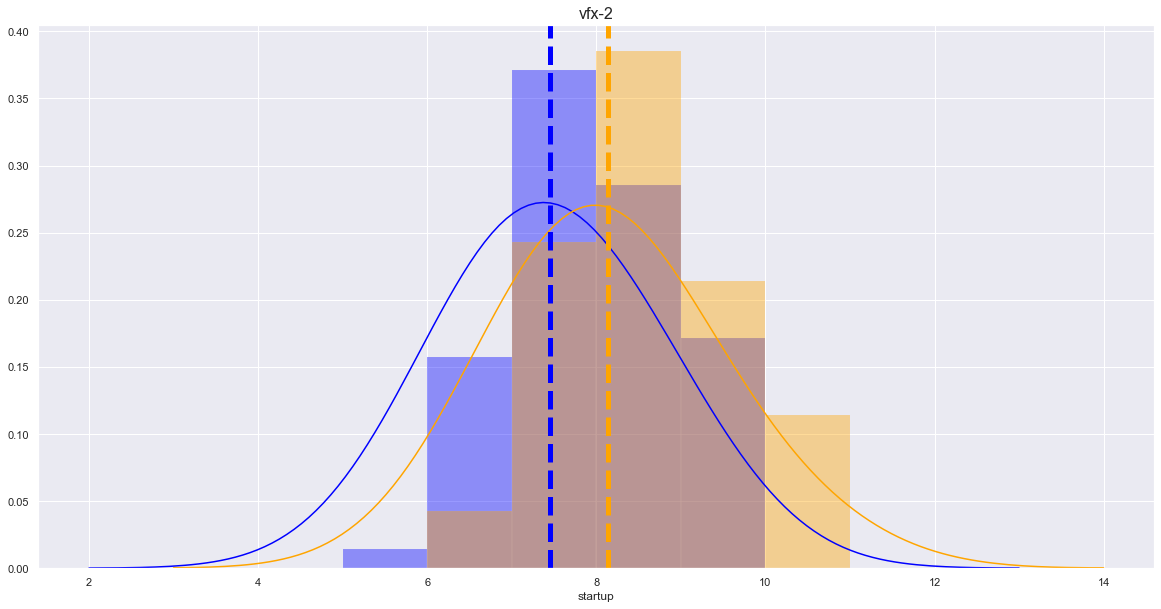

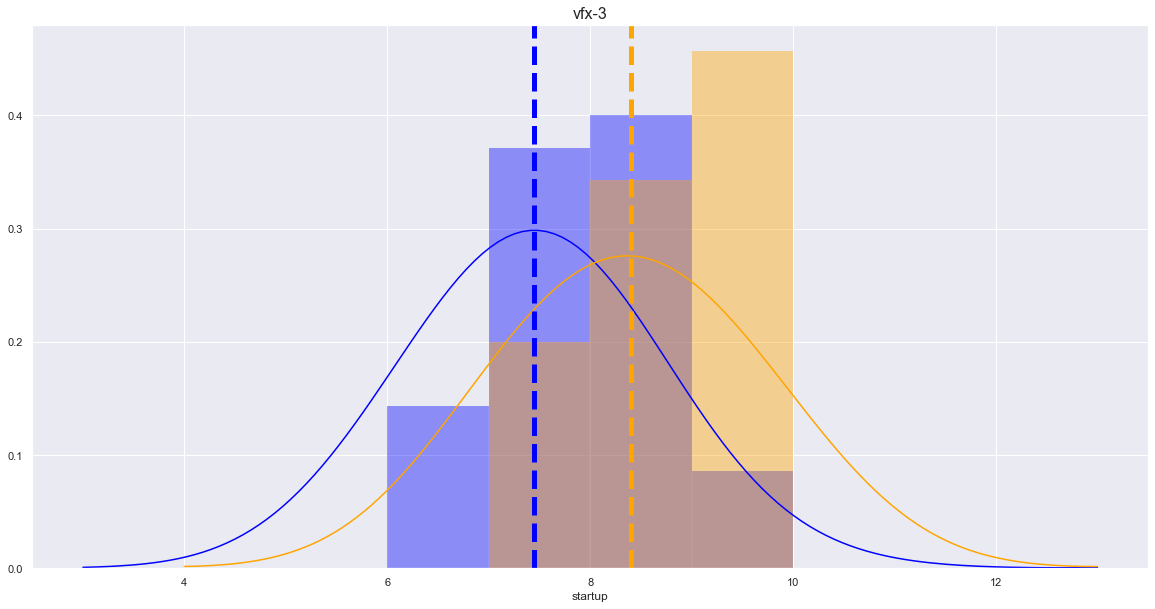

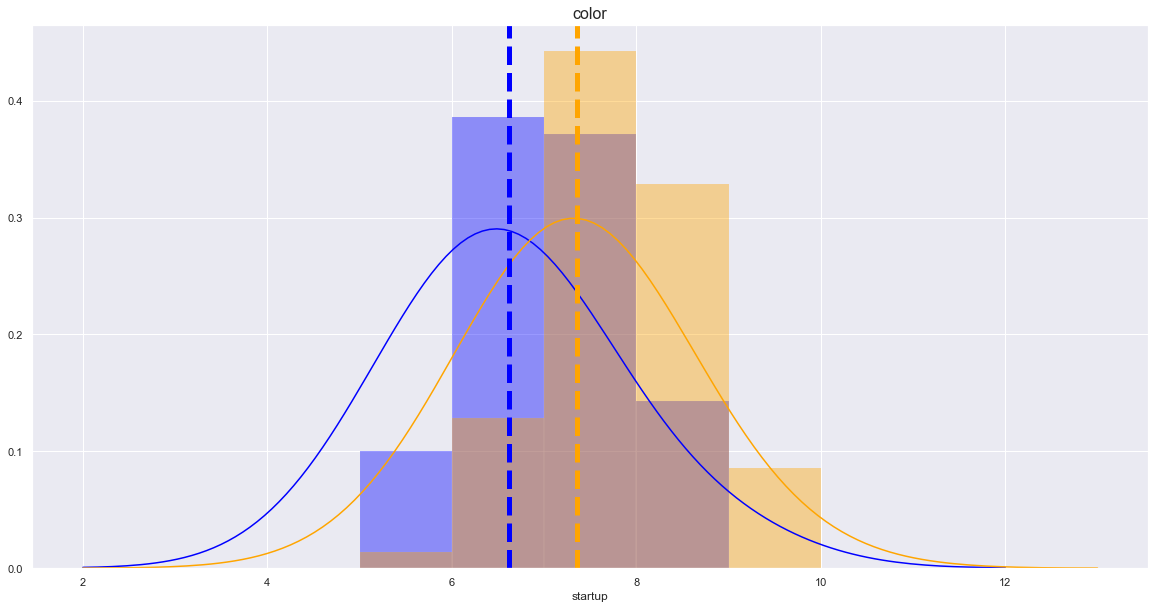

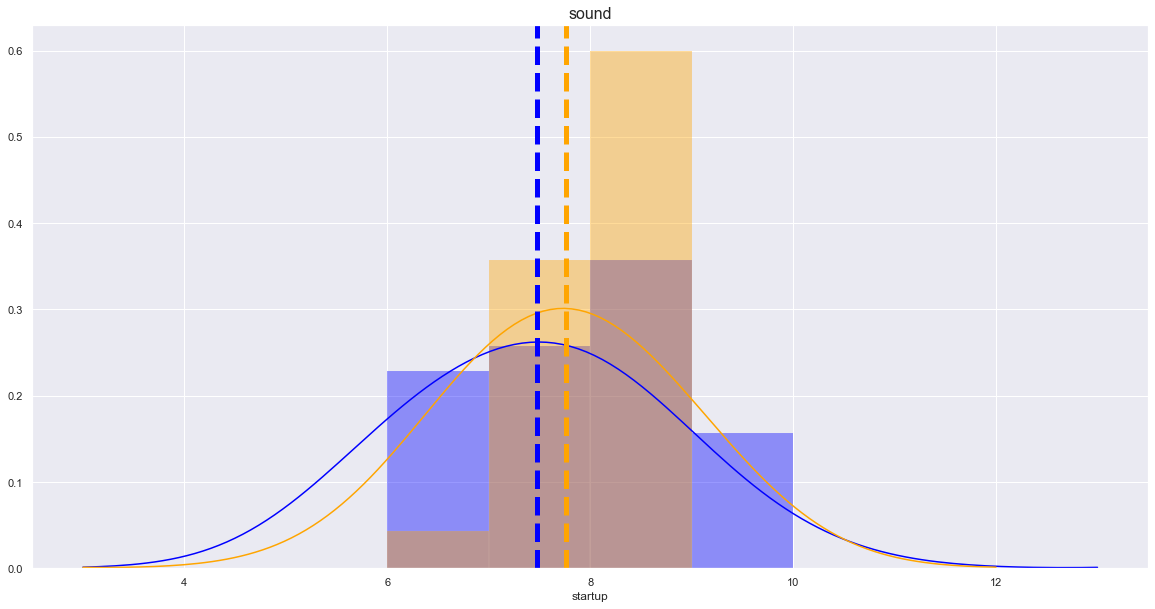

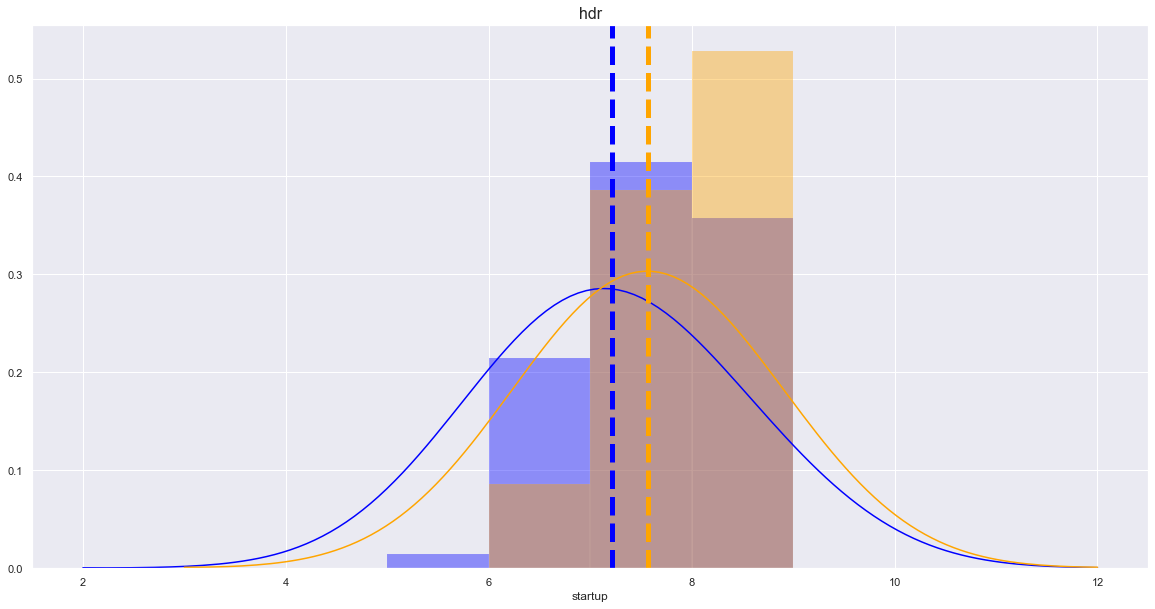

In [16]:
# Plot distribution for all pods
for no_opa_idx, df_no_opa_spe in enumerate(dfs_no_opa_pods):
    for opa_idx, df_opa_spe in enumerate(dfs_opa_pods):
        if no_opa_idx == opa_idx:           
            plot_distribution_2(df_no_opa_spe['startup'], df_opa_spe['startup'], df_opa_spe.iat[0,0])

# General statistics
***

In [17]:
print("OPA vs NO OPA")
print("Means       {}     {}".format(df_opa["startup"].mean(), df_no_opa["startup"].mean()))
print("Difference:          {}".format(df_opa["startup"].mean() - df_no_opa["startup"].mean()))
print("Std         {}     {}".format(df_opa["startup"].std(), df_no_opa["startup"].std()))
print("Difference:          {}".format(df_opa["startup"].std() - df_no_opa["startup"].std()))
print("\n")


for no_opa_idx, df_no_opa_spe in enumerate(dfs_no_opa_pods):
    for opa_idx, df_opa_spe in enumerate(dfs_opa_pods):
        if no_opa_idx == opa_idx:
            print(df_no_opa_spe.iat[0,0])
            print("Means       {}     {}".format(df_opa_spe["startup"].mean(), df_no_opa_spe["startup"].mean()))
            print("Difference:          {}".format(df_opa_spe["startup"].mean() - df_no_opa_spe["startup"].mean()))
            print("Std         {}     {}".format(df_opa_spe["startup"].std(), df_no_opa_spe["startup"].std()))
            print("Difference:          {}".format(df_opa_spe["startup"].std() - df_no_opa_spe["startup"].std()))
            print("\n")

OPA vs NO OPA
Means       7.834558823529412     7.147085201793722
Difference:          0.6874736217356903
Std         1.0268791369708477     1.0617716753519748
Difference:          -0.03489253838112716


owner
Means       7.285714285714286     7.185714285714286
Difference:          0.09999999999999964
Std         0.836536287714123     0.8729901495677005
Difference:          -0.03645386185357746


vfx-1
Means       8.071428571428571     6.957142857142857
Difference:          1.1142857142857139
Std         1.1075685416867715     0.9990678885655034
Difference:          0.10850065312126811


vfx-2
Means       8.142857142857142     7.457142857142857
Difference:          0.685714285714285
Std         1.107101114554037     1.0311905921152893
Difference:          0.07591052243874774


vfx-3
Means       8.4     7.442857142857143
Difference:          0.9571428571428573
Std         0.969087423704698     0.8786635814923673
Difference:          0.09042384221233069


color
Means       7.357142857142

# T-Tests
***

In [18]:
# t test
def t_test(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('t-statistic=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [19]:
alpha = 0.05

print('NO OPA vs OPA')
t_test(df_opa["startup"], df_no_opa["startup"], alpha, len(df_no_opa.index))
print('\n')

for no_opa_idx, df_no_opa_spe in enumerate(dfs_no_opa_pods):
    for opa_idx, df_opa_spe in enumerate(dfs_opa_pods):
        if no_opa_idx == opa_idx:
            print(df_no_opa_spe.iat[0,0])
            t_test(df_opa_spe["startup"], df_no_opa_spe["startup"], alpha, len(df_no_opa.index))
            print('\n')

NO OPA vs OPA
t-statistic=15.442, p=0.000
Different distributions (reject H0)


owner
t-statistic=0.692, p=0.490
Same distributions (fail to reject H0)


vfx-1
t-statistic=6.250, p=0.000
Different distributions (reject H0)


vfx-2
t-statistic=3.792, p=0.000
Different distributions (reject H0)


vfx-3
t-statistic=6.122, p=0.000
Different distributions (reject H0)


color
t-statistic=4.662, p=0.000
Different distributions (reject H0)


sound
t-statistic=1.767, p=0.079
Same distributions (fail to reject H0)


hdr
t-statistic=2.378, p=0.019
Different distributions (reject H0)




# Effect sizes
***

In [20]:
import math

# function to calculate Cohen's d for independent samples
def cohend(number_of_observations_1, number_of_observations_2, standard_deviation_1, standard_deviation_2, mean_1, mean_2):
    # calculate the pooled standard deviation
    s = math.sqrt(((number_of_observations_1 - 1) * standard_deviation_1 + (number_of_observations_2 - 1) * standard_deviation_2) / (number_of_observations_1 + number_of_observations_2 - 2))
    # calculate the effect size
    return (mean_1 - mean_2) / s


print("NO OPA vs OPA")
print("Cohen's d {:.3f}".format(cohend(len(df_opa.index), len(df_no_opa.index), df_opa["startup"].std(), df_no_opa["startup"].std(), df_opa["startup"].mean(), df_no_opa["startup"].mean())))
print("\n")

for no_opa_idx, df_no_opa_spe in enumerate(dfs_no_opa_pods):
    for opa_idx, df_opa_spe in enumerate(dfs_opa_pods):
        if no_opa_idx == opa_idx:
            print(df_no_opa_spe.iat[0,0])
            print("Cohen's d {:.3f}".format(cohend(len(df_opa_spe.index), len(df_no_opa_spe.index), df_opa_spe["startup"].std(), df_no_opa_spe["startup"].std(), df_opa_spe["startup"].mean(), df_no_opa_spe["startup"].mean())))
            print("\n")

NO OPA vs OPA
Cohen's d 0.673


owner
Cohen's d 0.108


vfx-1
Cohen's d 1.086


vfx-2
Cohen's d 0.663


vfx-3
Cohen's d 0.996


color
Cohen's d 0.765


sound
Cohen's d 0.293


hdr
Cohen's d 0.379




# Power analysis
***

In [21]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower

# Get sample size
def power_analysis(effect_size, alpha=0.05, power=0.95):
    analysis = TTestIndPower()
    sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=1.0, alpha=alpha)
    return sample_size

# Get power
def power_analysis_2(sample_size, effect_size, alpha=0.05):
    analysis = TTestIndPower()
    power = analysis.solve_power(effect_size=effect_size, nobs1=sample_size, ratio=1.0, alpha=alpha)
    return power

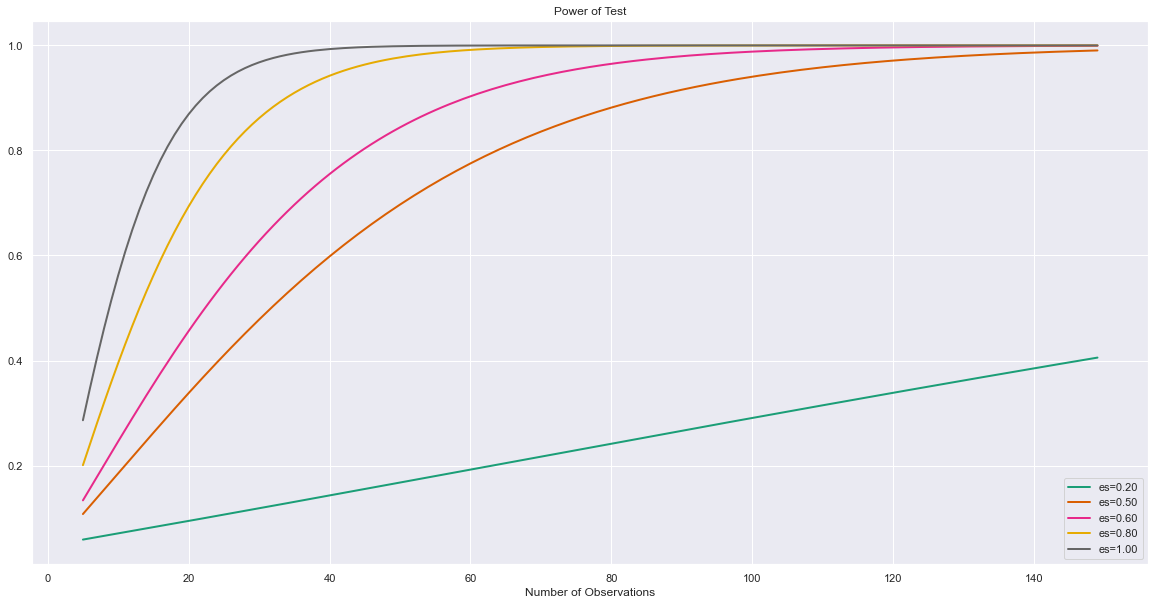

In [22]:
# Required number of observations according to effect sizes and sample sizes
effect_sizes = np.array([0.2, 0.5, 0.6, 0.8, 1])
sample_sizes = np.array(range(5, 150))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

In [23]:
# Sample size from power analysis
print("NO OPA vs OPA")
print("Effect size: {:f}".format(cohend(len(df_opa.index), len(df_no_opa.index), df_opa["startup"].std(), df_no_opa["startup"].std(), df_opa["startup"].mean(), df_no_opa["startup"].mean())))
print("Effective sample size: {:f}".format(len(df_opa.index)))
print("Required sample size: {:f}".format(power_analysis(cohend(len(df_opa.index), len(df_no_opa.index), df_opa["startup"].std(), df_no_opa["startup"].std(), df_opa["startup"].mean(), df_no_opa["startup"].mean()))))
print("\n")

for no_opa_idx, df_no_opa_spe in enumerate(dfs_no_opa_pods):
    for opa_idx, df_opa_spe in enumerate(dfs_opa_pods):
        if no_opa_idx == opa_idx:
            print(df_no_opa_spe.iat[0,0])
            print("Effect size: {:f}".format(cohend(len(df_opa_spe.index), len(df_no_opa_spe.index), df_opa_spe["startup"].std(), df_no_opa_spe["startup"].std(), df_opa_spe["startup"].mean(), df_no_opa_spe["startup"].mean())))
            print("Effective sample size: {:f}".format(len(df_opa_spe.index)))
            print("Required sample size: {:f}".format(power_analysis(cohend(len(df_opa_spe.index), len(df_no_opa_spe.index), df_opa_spe["startup"].std(), df_no_opa_spe["startup"].std(), df_opa_spe["startup"].mean(), df_no_opa_spe["startup"].mean()))))
            print("\n")

NO OPA vs OPA
Effect size: 0.672657
Effective sample size: 1088.000000
Required sample size: 58.417597


owner
Effect size: 0.108163
Effective sample size: 70.000000
Required sample size: 2222.440768


vfx-1
Effect size: 1.085717
Effective sample size: 70.000000
Required sample size: 23.054449


vfx-2
Effect size: 0.663170
Effective sample size: 70.000000
Required sample size: 60.072281


vfx-3
Effect size: 0.995795
Effective sample size: 70.000000
Required sample size: 27.208823


color
Effect size: 0.765424
Effective sample size: 70.000000
Required sample size: 45.343664


sound
Effect size: 0.293353
Effective sample size: 70.000000
Required sample size: 302.970240


hdr
Effect size: 0.379333
Effective sample size: 70.000000
Required sample size: 181.582101




In [24]:
# Power from power analysis
print("NO OPA vs OPA")
print("Effect size: {:f}".format(cohend(len(df_opa.index), len(df_no_opa.index), df_opa["startup"].std(), df_no_opa["startup"].std(), df_opa["startup"].mean(), df_no_opa["startup"].mean())))
print("Sample size: {:f}".format(len(df_opa.index)))
print("Power: {:f}".format(power_analysis_2(len(df_opa.index), cohend(len(df_opa.index), len(df_no_opa.index), df_opa["startup"].std(), df_no_opa["startup"].std(), df_opa["startup"].mean(), df_no_opa["startup"].mean()))))
print("\n")

for no_opa_idx, df_no_opa_spe in enumerate(dfs_no_opa_pods):
    for opa_idx, df_opa_spe in enumerate(dfs_opa_pods):
        if no_opa_idx == opa_idx:
            print(df_no_opa_spe.iat[0,0])
            print("Effect size: {:f}".format(cohend(len(df_opa_spe.index), len(df_no_opa_spe.index), df_opa_spe["startup"].std(), df_no_opa_spe["startup"].std(), df_opa_spe["startup"].mean(), df_no_opa_spe["startup"].mean())))
            print("Effective sample size: {:f}".format(len(df_opa_spe.index)))
            print("Power: {:f}".format(power_analysis_2(len(df_opa_spe.index), cohend(len(df_opa_spe.index), len(df_no_opa_spe.index), df_opa_spe["startup"].std(), df_no_opa_spe["startup"].std(), df_opa_spe["startup"].mean(), df_no_opa_spe["startup"].mean()))))
            print("\n")

NO OPA vs OPA
Effect size: 0.672657
Sample size: 1088.000000
Power: 1.000000


owner
Effect size: 0.108163
Effective sample size: 70.000000
Power: 0.097391


vfx-1
Effect size: 1.085717
Effective sample size: 70.000000
Power: 1.000000


vfx-2
Effect size: 0.663170
Effective sample size: 70.000000
Power: 0.973563


vfx-3
Effect size: 0.995795
Effective sample size: 70.000000
Power: 1.000000


color
Effect size: 0.765424
Effective sample size: 70.000000
Power: 0.994404


sound
Effect size: 0.293353
Effective sample size: 70.000000
Power: 0.406620


hdr
Effect size: 0.379333
Effective sample size: 70.000000
Power: 0.605880




In [25]:
# Percentages
low_bound_percent = 0.2161301428817355 / 7.445859872611465 * 100
high_bound_percent = 1.1472463768115952 / 8.173913043478262 * 100

print(low_bound_percent, high_bound_percent)

2.9026888308325467 14.035460992907813
